In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
employees = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')


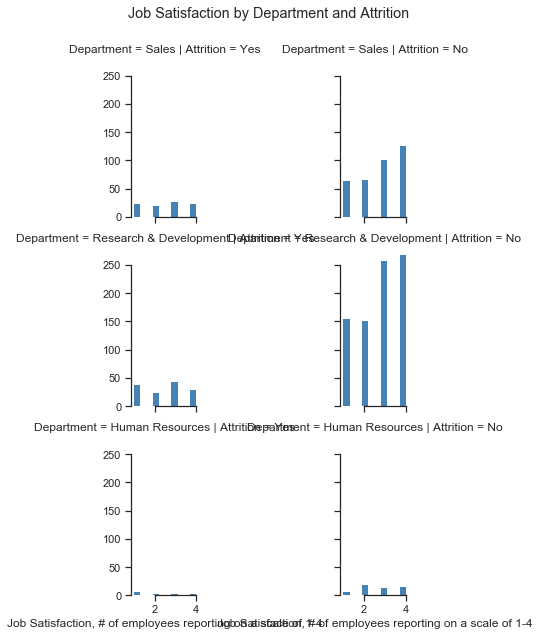

In [4]:
sns.set(style="ticks")  
g = sns.FacetGrid(employees, row="Department", col="Attrition")
g.map(plt.hist, "JobSatisfaction", color="steelblue",  lw=0)
plt.subplots_adjust(top=0.9)
g.set_axis_labels('Job Satisfaction, # of employees reporting on a scale of 1-4')
plt.suptitle('Job Satisfaction by Department and Attrition')
# Removing excess lines around the plot.
sns.despine(trim=True)
plt.show()

#### 1.1 Columnplot: Job satisfaction by Department and Attrition ####

Well, it works, but it's a bit confusing due to the difference in scale for the attrition vs. non-attrition populations.  It shows total population who responded with a particular score, instead of the average score for each population, making this a less-than-useful chart.

/usr/local/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


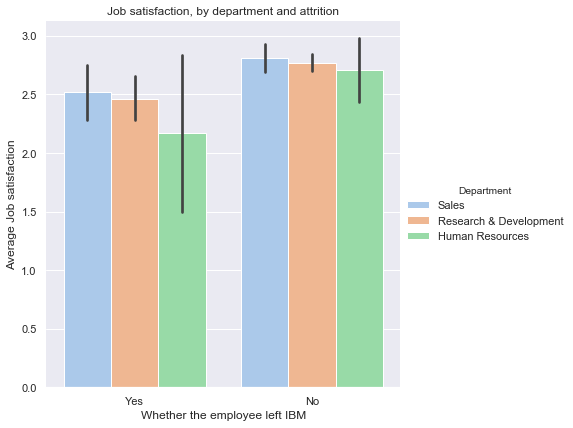

In [5]:
sns.set(style="darkgrid")

g = sns.factorplot(x="Attrition", y="JobSatisfaction", hue="Department", data=employees,
                   size=6, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("Average Job satisfaction")
g.set_xlabels("Whether the employee left IBM")
plt.title('Job satisfaction, by department and attrition')
plt.show()

#### 1.2 Barplot: Job satisfaction by Department and Attrition ####

The dynamite plot is much better in communicating content than the column plot, but it runs into it's own problems.  Specifically, it measures the average, but implies a total, with a margin of error, rather than the average of the job satisfaction ratings.

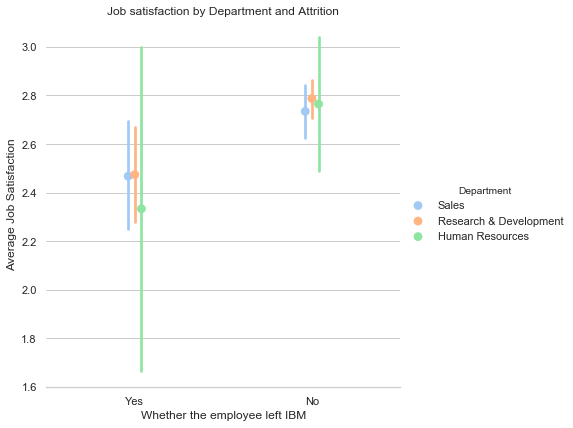

In [6]:
sns.set(style="whitegrid")
a1plot = sns.factorplot(x="Attrition", y="EnvironmentSatisfaction", hue="Department", data=employees,
                   size=6, kind="point", palette="pastel",ci=95,dodge=True,join=False)
a1plot.despine(left=True)
a1plot.set_ylabels("Average Job Satisfaction")
a1plot.set_xlabels("Whether the employee left IBM")
plt.title('Job satisfaction by Department and Attrition')
plt.show()

#### 1.3 Pointplot: Job satisfaction by Department and Attrition ####

Much better.  It highlights the average value, makes the variance clear, and leaves it at that.  I wish that it would extend its min & max values to 1 & 4, respectively, but I'm sure there's a line of code that I could find to tweak that if I wanted to spend the time digging in the readme for it.




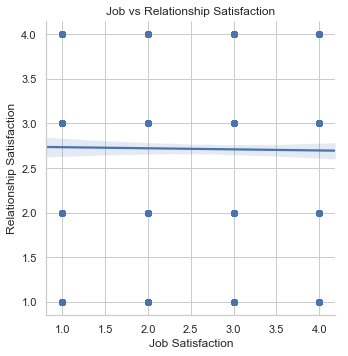

In [7]:
g = sns.lmplot(y='RelationshipSatisfaction', 
               x='JobSatisfaction',
               data=employees,
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
g.set_ylabels("Relationship Satisfaction")
g.set_xlabels("Job Satisfaction")
plt.title('Job vs Relationship Satisfaction')
plt.show()

#### 1.4 Scatterplot with regression line: Job vs Relationship Satisfaction ####

Well, that didn't work at all...  Scatterplots with only 4 possible values don't seem to work too well.  I'm not terribly surprised, frankly, but I was curious whether it would produce anything valuable.  The regression line does show a small but noticeable amount of variation, though I'd wager not enough to really draw enough conclusions.

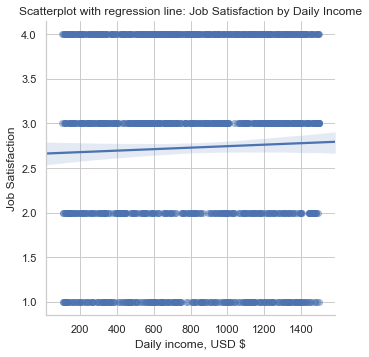

In [8]:
g = sns.lmplot(y='JobSatisfaction', 
               x='DailyRate',
               data=employees,
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
g.set_ylabels("Job Satisfaction")
g.set_xlabels("Daily income, USD $")
plt.title('Scatterplot with regression line: Job Satisfaction by Daily Income')
plt.show()

#### 1.4b Scatterplot with regression line: Job Satisfaction vs Daily Rate ####

That's a *bit* better.  Still not good, given that the dots merge so heavily, but there's a clear, if slight, upward trendline in the regression curve as you go up the income scale.

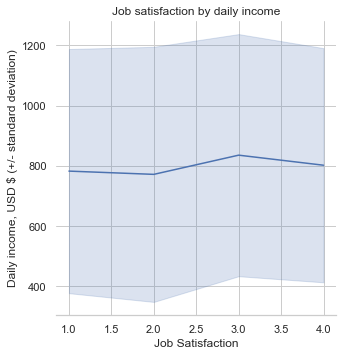

In [9]:
x = sns.relplot(x="JobSatisfaction", y="DailyRate", kind="line", ci="sd", data=employees)
x.despine(left=True)
x.set_ylabels("Daily income, USD $ (+/- standard deviation)")
x.set_xlabels("Job Satisfaction")
plt.title('Job satisfaction by daily income')
plt.show()

#### 1.4c Lineplot with standard deviation spread: Job Satisfaction vs Daily Rate ####

Finally, something that isn't incredibly ugly.  Still not very useful, though, at least not to my eyes - the trendline wiggles so slightly, compared to the massive variance, that I'd honestly be surprised if this was a statistically meaningful comparison.

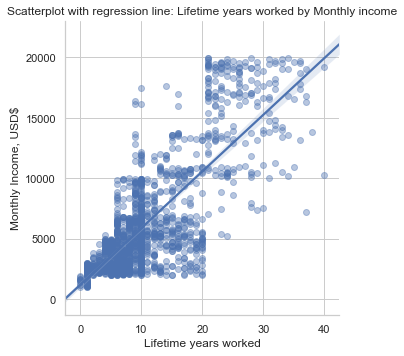

In [10]:
g = sns.lmplot(y='MonthlyIncome', 
               x='TotalWorkingYears',
               data=employees,
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
g.set_ylabels("Monthly Income, USD$")
g.set_xlabels("Lifetime years worked")
plt.title('Scatterplot with regression line: Lifetime years worked by Monthly income')
plt.show()

#### 2.1 Scatterplot with regression line: Lifetime years worked vs Monthly income ####

That's a LOT better.  It clearly shows that there's a distinct increase of salary correlated with time spent in a career.  There's also an interesting effect where they literally don't seem to have *any* employees who have worked for more than 20 years who earn less than 5k per month; I'm uncertain whether this is due to them being fired, leaving, or being promoted above that wage level once they reach a certain point. The chart also shows there are distinct paygrades in the monthly income scale at IBM, with so many people clustering in clear vertical lines.

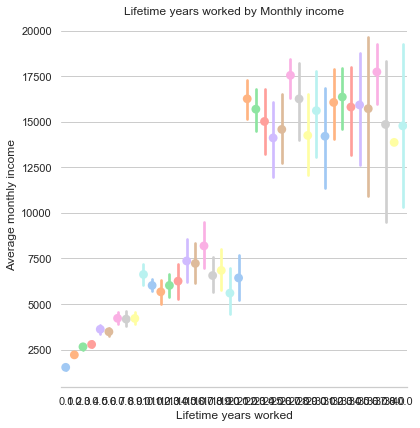

In [11]:
sns.set(style="whitegrid")
a1plot = sns.factorplot(x="TotalWorkingYears", y="MonthlyIncome", data=employees,
                   size=6, kind="point", palette="pastel",ci=95,dodge=True,join=False)
a1plot.despine(left=True)
a1plot.set_ylabels("Average monthly income")
a1plot.set_xlabels("Lifetime years worked")
plt.title('Lifetime years worked by Monthly income')
plt.show()

#### 2.2 Pointplot: Lifetime years worked vs Monthly income ####

Well, aside from the cramped and illegible x axis labels, that's a complete success.  (Really brightly colored, too.)  Distinctly shows the gap in wages between the under-20 and over-20 career lengths.

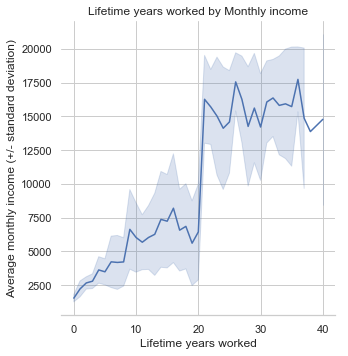

In [12]:
x = sns.relplot(x="TotalWorkingYears", y="MonthlyIncome", kind="line", ci="sd", data=employees)
x.despine(left=True)
x.set_ylabels("Average monthly income (+/- standard deviation)")
x.set_xlabels("Lifetime years worked")
plt.title('Lifetime years worked by Monthly income')
plt.show()

#### 2.3 Lineplot with standard deviation spread: Lifetime years worked vs Monthly income ####

That's... well, it's ugly, but it's not actually that much different, in content at least.  Certainly the x-axis is more understandable, though the standard deviation for each year makes for an ugly sawtooth look.  Still, I think that the continuous line makes for a rather emphatic underlining of the wage spike for people who've worked more than 20 years.

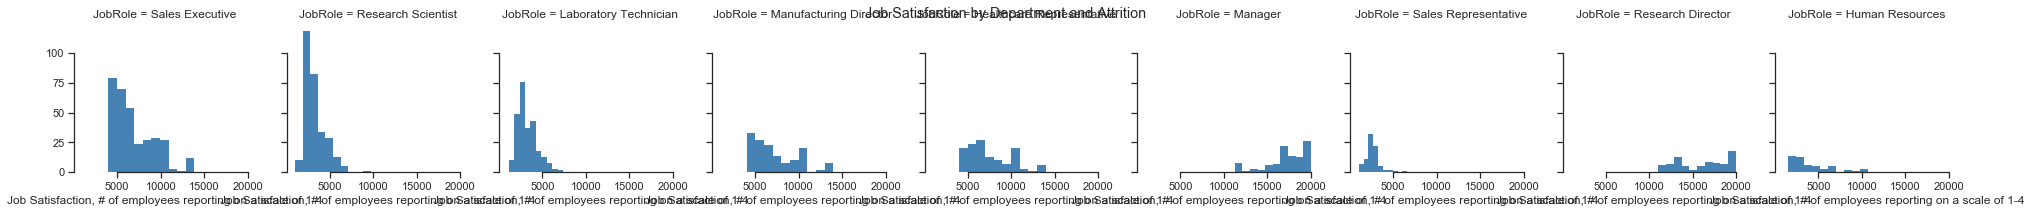

In [13]:
sns.set(style="ticks")  
g = sns.FacetGrid(employees, col="JobRole")
g.map(plt.hist, "MonthlyIncome", color="steelblue",  lw=0)
plt.subplots_adjust(top=0.9)
g.set_axis_labels('Job Satisfaction, # of employees reporting on a scale of 1-4')
plt.suptitle('Job Satisfaction by Department and Attrition')
# Removing excess lines around the plot.
sns.despine(trim=True)
plt.show()

#### 3.1 Columnplot: Job Position vs Monthly income ####

Ick.  There's got to be a way to make this more legible.  Well, besides the cramped visual caused by the lack of space, this is actually quite useful for showing the spread of wages in a particular job role, as well as giving a vague estimate of how many people fill each role, and the relative wages for each position (i.e. Research Directors earn distinctly more than Lab Techs).

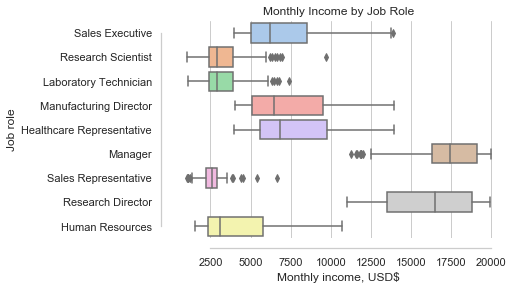

In [14]:
sns.set(style="whitegrid")

ax = sns.boxplot(x='MonthlyIncome',y='JobRole',data=employees,palette='pastel')  

plt.title('Monthly Income by Job Role')

sns.despine(offset=10, trim=True)
ax.set(xlabel='Monthly income, USD$', ylabel='Job role')

plt.show()

#### 3.2 Boxplot: Job Position vs Monthly income ####

Unsurprisingly, boxplots are a lot easier to see this kind of information in.  You lose out on the sense of scale - how many people are in each of the positions - that the barplot offers, but it's a lot clearer in terms of depicting the average salary, which is the primary focus of this particular comparison anyway; if you want to see how many people are in each position, you make a barplot with the counts for each position, and leave the wages out of it.

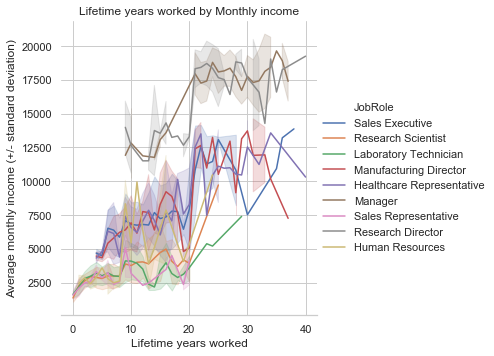

In [15]:

x = sns.relplot(x="TotalWorkingYears", y="MonthlyIncome", hue="JobRole", kind="line", ci="sd", data=employees)
x.despine(left=True)
x.set_ylabels("Average monthly income (+/- standard deviation)")
x.set_xlabels("Lifetime years worked")
plt.title('Lifetime years worked by Monthly income')
plt.show()

#### 3.3 Lineplot with standard deviation spread: Lifetime Years Worked vs Monthly income, compared by Job Role ####

I had to add in the numeric of lifetime years worked in order to make this function properly; lineplots don't deal well with categorical variables.  I suppose that I could have made a variable to count how many people were in each role, but that'd be rather boring, I expect.

This, however, has a lot of interesting results, clearly showing that there are three general tiers of jobs, with Managers and Research Directors at the top, and Sales Reps, Lab Techs, and (shockingly, to me) Research Scientists at the bottom.  

As far as pros & cons, it clearly shows the impact of years and job role on income, but this is a messy way to show these lines, given the number of them; separate subcharts would likely do a clearer job of showing the differences.  

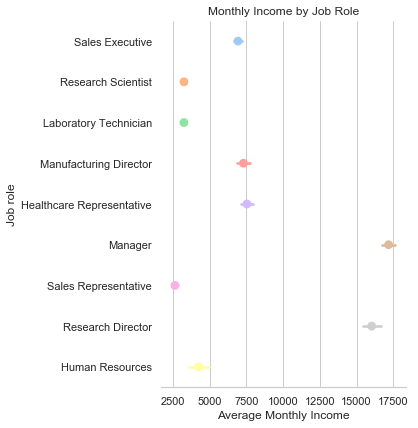

In [16]:
sns.set(style="whitegrid")
a1plot = sns.factorplot(x="MonthlyIncome", y="JobRole", data=employees,
                   size=6, kind="point", palette="pastel",ci=95,dodge=True,join=False)
a1plot.despine(left=True)
a1plot.set_ylabels("Job role")
a1plot.set_xlabels("Average Monthly Income")
plt.title('Monthly Income by Job Role')
plt.show()

#### 3.4 Pointplot: Job Position vs Monthly income ####

This doesn't show the data's variance nearly as well as the boxplot did, which is odd.  Am I missing something, here?

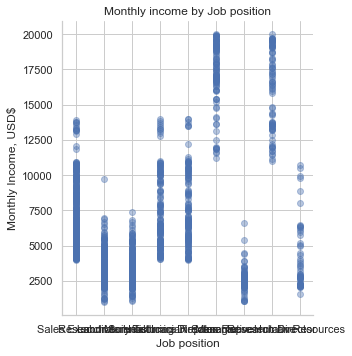

In [17]:
g = sns.lmplot(y='MonthlyIncome', 
    x='JobRole',
    data=employees,
    fit_reg=False,
    scatter_kws={'alpha':0.4})
g.set_ylabels("Monthly Income, USD$")
g.set_xlabels("Job position")
plt.title('Monthly income by Job position')
plt.show()

#### 3.5 Scatterplot: Job Position vs Monthly income ####

Well that's aggravating.  It throws massive errors when I try to switch the axes, likely because it isn't designed to count in rows instead of columns.  So, now we can't read the x-axis labels.

Even ignoring that, though, this plot has... definite issues.  It's functionally similar to the boxplot, but it doesn't offer the mean or the variance.  It's only real advantage over the boxplot is that it shows clusters of similar wages as well as the outliers.

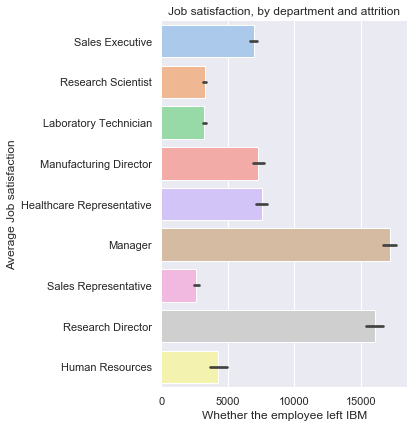

In [18]:
sns.set(style="darkgrid")

g = sns.factorplot(x="MonthlyIncome", y="JobRole", data=employees,
                   size=6, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("Average Job satisfaction")
g.set_xlabels("Whether the employee left IBM")
plt.title('Job satisfaction, by department and attrition')
plt.show()

#### 3.6 Barplot: Job Position vs Monthly income ####

The dynamite plot offers a lot less than the boxplot, though in this case it actually shows the variance a bit better than the pointplot.